In [12]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import scipy.stats as stats
import pandas as pd
import sklearn.linear_model as lm

import matplotlib as mpl

# Set the global font to be Times New Roman
mpl.rcParams['font.family'] = 'Arial'
text_size = 32
mpl.rcParams['axes.titlesize'] =  text_size # Title font size
mpl.rcParams['axes.labelsize'] =  text_size # Axis labels font size
mpl.rcParams['xtick.labelsize'] = text_size  # X tick labels font size
mpl.rcParams['ytick.labelsize'] = text_size  # Y tick labels font size
mpl.rcParams['legend.fontsize'] = text_size  # Legend font size
#mpl.rcParams['legend.labelsize'] = text_size  # Legend font size

mpl.rcParams.keys() 

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

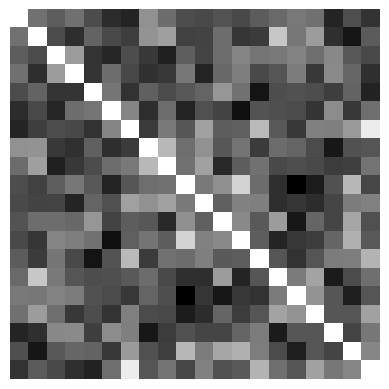

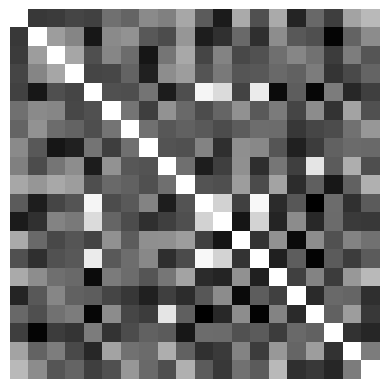

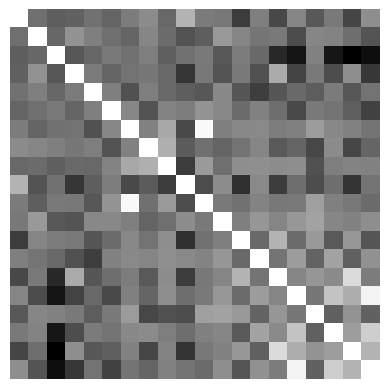

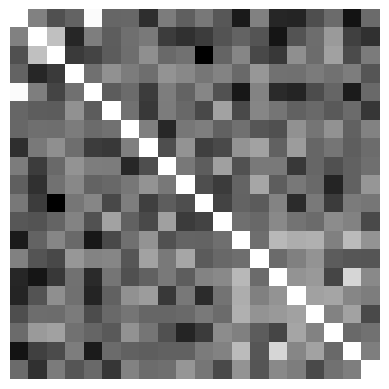

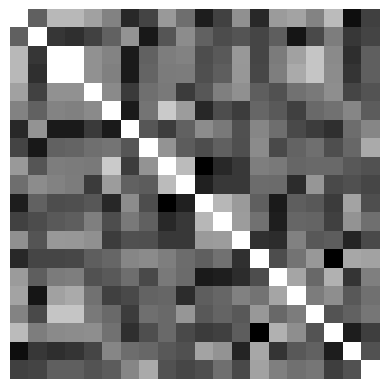

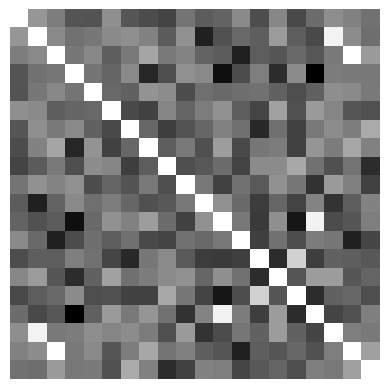

In [13]:
import numpy as np

size = 20
n_connections = 10



def connectivity_matrix(size,n_connections,seed = 0):
    np.random.seed(seed)
    # Generate a random correlation matrix
    #np.random.seed(49)  # For reproducibility
    # Size of the correlation matrix
    rand_matrix = np.random.rand(size, size)

    # random pairs of more correlated points
    link_nodes = [(i,j) for i,j in zip(np.random.randint(0,size,n_connections),np.random.randint(0,size,n_connections))]
    for i,j in link_nodes:
        rand_matrix[:,i] = rand_matrix[:,j] + np.random.normal(0,np.random.rand(1),20)


    corr_matrix = np.corrcoef(rand_matrix, rowvar=False)  # Make the matrix symmetric

    return(corr_matrix)

mat_list = []
seed = 10
for i in range(0 + seed, 6 + seed):
    mat = connectivity_matrix(size = size,n_connections = n_connections,seed = i)
    fig, ax = plt.subplots()
    ax.imshow(mat, cmap='gray', interpolation='none');
    ax.axis("off")
    fig.savefig(f"connectivity_matrix_{i}");
    mat_list.append(mat)
# mat = connectivity_matrix(size = size,n_connections = n_connections ,seed = 2)
# plt.imshow(mat, cmap='gray', interpolation='none')

#plt.colorbar()

1 0
2 0


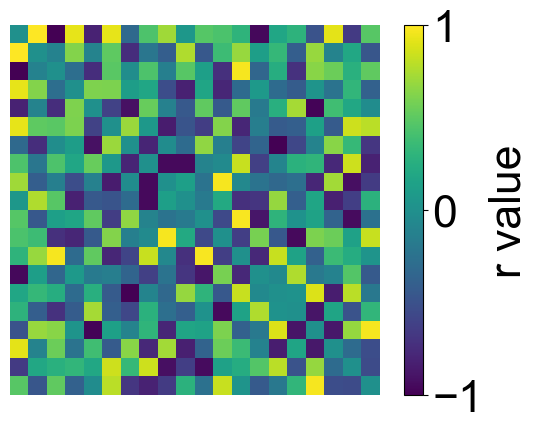

In [15]:
#def correlation_matrix()
rand_matrix = np.zeros((size,size))
rand_matrix[[0,1],[1,0]] = 1
rand_matrix[[0,2],[2,0]] = -1
#print(rand_matrix)
for i in range(size):
    for j in range(i):
        temp = np.random.random() * 2 - 1
        if (i == 0 and (j == 1 or j == 2)) or (j == 0 and (i == 1 or i == 2)):
            print(i,j)
            pass
        else:
            rand_matrix[i,j] = temp
            rand_matrix[j,i] = temp
plt.imshow(rand_matrix, cmap='viridis', interpolation='none')
cbar = plt.colorbar()
cbar.set_label("r value",fontsize = text_size)
cbar.set_ticks([-1,0,1])
plt.axis("off")
plt.savefig("correlation_matrix")

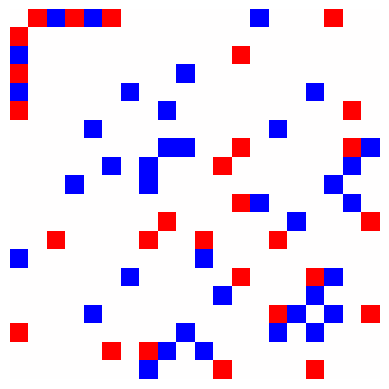

In [16]:
threshold = 0.8
temp1 = (rand_matrix > threshold).astype(int)
np.fill_diagonal(temp1, 0)
temp2 = (rand_matrix < -threshold).astype(int)
network_mat = temp1 - temp2

# colors = ['blue', 'white', 'red']  # Colors for -0.1, 0, and 0.1 respectively
# cmap = ListedColormap(colors)
plt.imshow(network_mat,cmap = "bwr")
plt.axis("off")
plt.savefig("network_matrix")

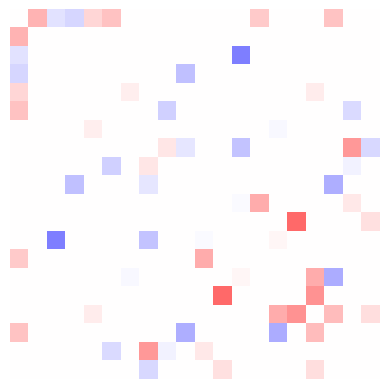

In [17]:
# pass each network through this
for i in range(len(mat_list)):
    mat = mat_list[i]
    new_mat = mat * network_mat
    plt.imshow(new_mat,cmap = "bwr",vmin = -1,vmax=1)
    #plt.colorbar()
    plt.axis("off")
    plt.savefig(f"network_matrix_{i}")


$$ 
\Sigma_{p1}
$$

10.703728421333553

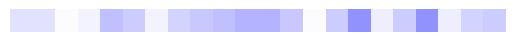

In [40]:
plt.imshow(new_mat[new_mat < 0].reshape(1,-1),cmap = "bwr",vmin = -1,vmax=1)
plt.axis("off")
sum(new_mat[new_mat > 0])

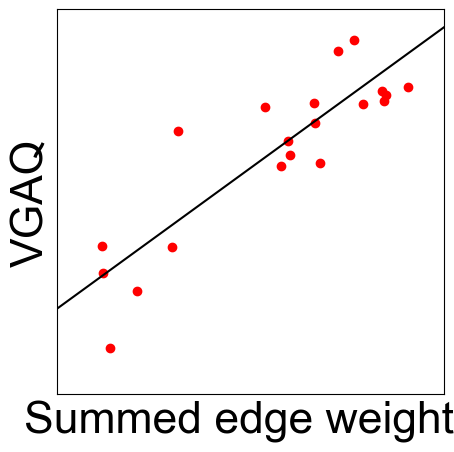

In [26]:
x = np.random.uniform(0,1,20)
y = x + np.abs(np.random.normal(0,0.2,20))

lm_model = lm.LinearRegression().fit(x.reshape(-1,1),y)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(x,y,color = "red")
bevel = 0.1
ax.plot([0,max(x)+bevel],[lm_model.predict(np.array(0).reshape(-1,1)),lm_model.predict(max(x).reshape(-1,1))+bevel],color = "black")
#ax.set_aspect("equal")
ax.set_xlabel("Summed edge weights")
ax.set_ylabel("VGAQ")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim([0,max(x)+bevel])
ax.set_ylim([0,max(y) + bevel])
fig.savefig("pos_linear_model")

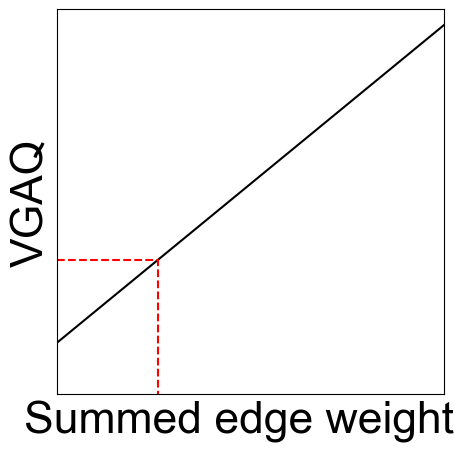

In [20]:
fig, ax = plt.subplots(figsize=(5,5))

test = np.random.uniform(min(x),max(x))
pred = lm_model.predict(np.array(test).reshape(-1,1))[0]
#ax.scatter(x,y,color = "black")
ax.plot([0,max(x)+bevel],[lm_model.predict(np.array(0).reshape(-1,1)),lm_model.predict(max(x).reshape(-1,1))+bevel],color = "black")
ax.plot([0,test,test],[pred,pred,0],color = "red",linestyle = "--")
ax.set_xlim([0,max(x)])
ax.set_ylim([0,max(y)])
#ax.set_aspect("equal")
ax.set_xlabel("Summed edge weights")
ax.set_ylabel("VGAQ")
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("prediction_using_pos_network")